In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
'''
Analysis of the following four NSE stocks from January 1st, 2016 to the current date:
1. Wockhardt Limited
2. Kaveri Seed Company Ltd.
3. Rajesh Exports Ltd.
4. Mirza International Ltd.
'''
from pandas.io.data import DataReader

from datetime import datetime
end = datetime.now()
start = '2016-01-01'

WockPharma = DataReader('WOCKPHARMA.NS', 'yahoo', start, end)
KaveriSeed = DataReader('KSCL.NS', 'yahoo', start, end)
RajeshExports = DataReader('RAJESHEXPO.BO', 'yahoo', start, end)
MirzaInt = DataReader('MIRZAINT.NS', 'yahoo', start, end)

In [13]:
WockPharma.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,1537.8,1614.00,1530.85,1603.75,1038300,1582.11
2016-01-04,1599.5,1627.55,1550.10,1578.40,1368100,1557.10
2016-01-05,1585.0,1600.00,1563.10,1579.70,1108300,1558.39
2016-01-06,1584.0,1618.90,1570.15,1576.60,972800,1555.33
2016-01-07,1567.2,1576.00,1536.70,1545.80,739600,1524.94


In [14]:
# Modify column names, so they can be distinguised from one another
WockPharma.columns = ['W_'+str(col) for col in WockPharma.columns]
KaveriSeed.columns = ['K_'+str(col) for col in KaveriSeed.columns]
RajeshExports.columns = ['R_'+str(col) for col in RajeshExports.columns]
MirzaInt.columns = ['M_'+str(col) for col in MirzaInt.columns]

In [15]:
WockPharma.head()

,W_Open,W_High,W_Low,W_Close,W_Volume,W_Adj Close
Date,,,,,,
2016-01-01,1537.8,1614.00,1530.85,1603.75,1038300,1582.11
2016-01-04,1599.5,1627.55,1550.10,1578.40,1368100,1557.10
2016-01-05,1585.0,1600.00,1563.10,1579.70,1108300,1558.39
2016-01-06,1584.0,1618.90,1570.15,1576.60,972800,1555.33
2016-01-07,1567.2,1576.00,1536.70,1545.80,739600,1524.94


In [16]:
WockPharma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2016-01-01 to 2017-01-12
Data columns (total 6 columns):
W_Open         270 non-null float64
W_High         270 non-null float64
W_Low          270 non-null float64
W_Close        270 non-null float64
W_Volume       270 non-null int64
W_Adj Close    270 non-null float64
dtypes: float64(5), int64(1)
memory usage: 14.8 KB


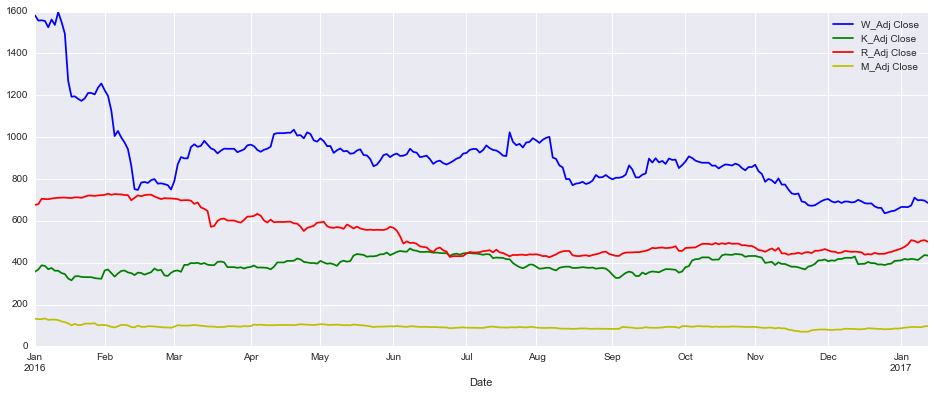

In [17]:
# Plotting the trend in Adjusted-Closing-Prices of the 4 Stocks over the last 1 year
AdjClosingPrices = DataFrame(pd.concat([WockPharma['W_Adj Close'], KaveriSeed['K_Adj Close'], 
                                        RajeshExports['R_Adj Close'], MirzaInt['M_Adj Close']], axis=1))

AdjClosingPrices.plot(figsize=(16,6), color=['b','g','r','y'])

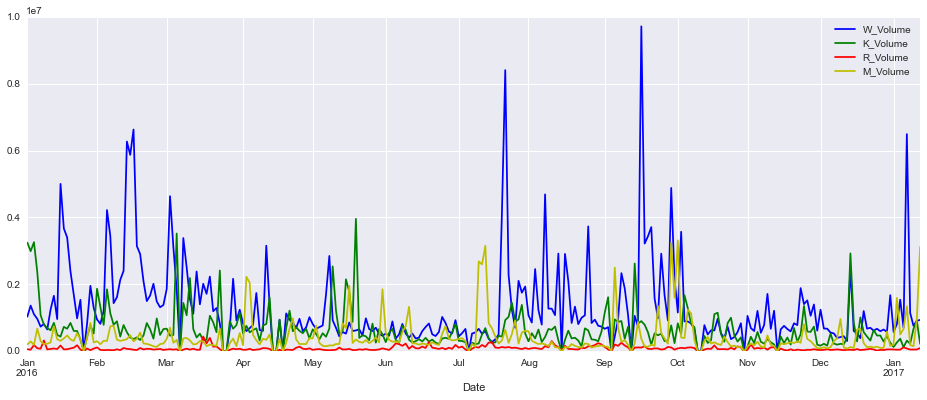

In [18]:
# Plotting the trend in Volume-Traded of the 4 Stocks over the last 1 year
VolumeTraded = DataFrame(pd.concat([WockPharma['W_Volume'], KaveriSeed['K_Volume'], 
                                    RajeshExports['R_Volume'], MirzaInt['M_Volume']], axis=1))

VolumeTraded.plot(figsize=(16,6), color=['b','g','r','y'])

# Note the scale of the graph (10s of Millions)

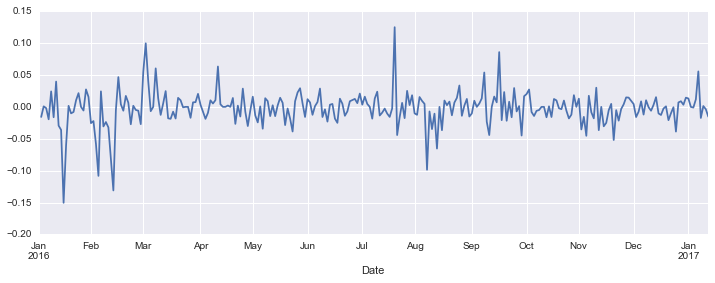

In [19]:
# Daily Return of a stock
WockPharma['Daily Return'] = WockPharma['W_Adj Close'].pct_change()
WockPharma['Daily Return'].plot(figsize=(12,4))

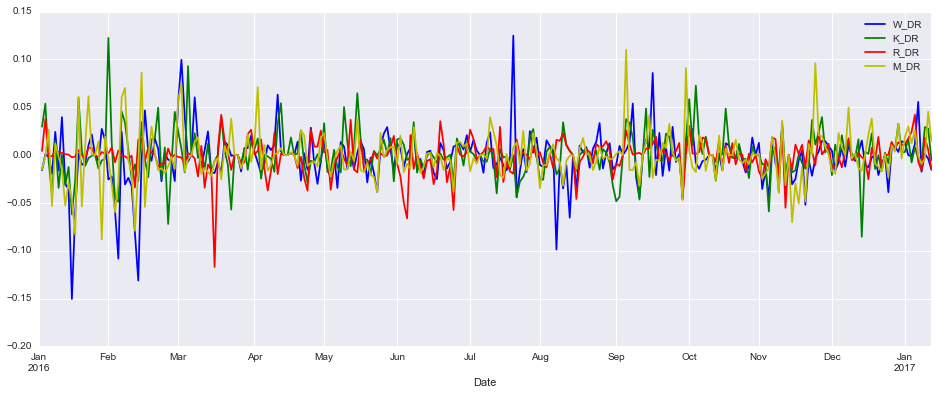

In [22]:
DailyReturns = AdjClosingPrices.pct_change()
# DR: Daily Return
DailyReturns.columns = ['W_DR', 'K_DR', 'R_DR', 'M_DR']
DailyReturns.plot(legend=True, figsize=(16,6), colors=['b','g','r','y'])

# This plot shows that Wockhardt and Mirza are a bit erratic in nature while the other two aren't (relatively).

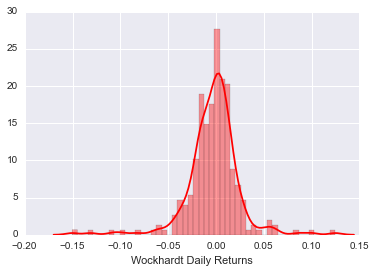

In [23]:
sns.distplot(DailyReturns['W_DR'].dropna(), bins=50, color='red', axlabel='Wockhardt Daily Returns')

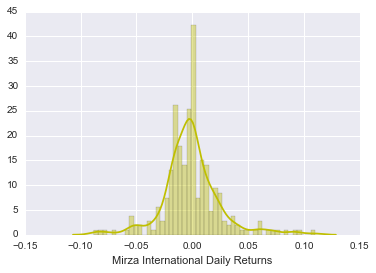

In [24]:
sns.distplot(DailyReturns['M_DR'].dropna(), bins=50, color='y', axlabel='Mirza International Daily Returns')

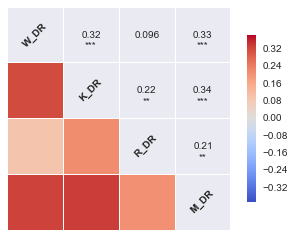

In [26]:
sns.corrplot(DailyReturns.dropna())

# This Correlation Matrix shows that there is least correlation between Wockhardt and Rajesh Exports, and most between
# Kaveri Seeds and Mirza International (although, still low)

In [27]:
# Calculating and plotting Moving Average (MA)
# To find out what it is: http://www.investopedia.com/terms/m/movingaverage.asp

# Moving Average over 20 and 50 days for Wockhardt
days = [20, 50]

for i in days:
    WockPharma['MA_'+str(i)] = pd.rolling_mean(WockPharma['W_Adj Close'], i)

# Understandably- the MA_20 value is NaN for the first 19 values, and MA_50 is NaN for the first 49 values
WockPharma

,W_Open,W_High,W_Low,W_Close,W_Volume,W_Adj Close,Daily Return,MA_20,MA_50
Date,,,,,,,,,
2016-01-01,1537.80,1614.00,1530.85,1603.75,1038300,1582.11,NaN,NaN,NaN
2016-01-04,1599.50,1627.55,1550.10,1578.40,1368100,1557.10,-0.015808,NaN,NaN
2016-01-05,1585.00,1600.00,1563.10,1579.70,1108300,1558.39,0.000828,NaN,NaN
2016-01-06,1584.00,1618.90,1570.15,1576.60,972800,1555.33,-0.001964,NaN,NaN
2016-01-07,1567.20,1576.00,1536.70,1545.80,739600,1524.94,-0.019539,NaN,NaN
2016-01-08,1560.00,1597.00,1548.00,1583.35,818500,1561.99,0.024296,NaN,NaN
2016-01-11,1559.75,1572.80,1524.65,1557.55,656200,1536.53,-0.016300,NaN,NaN
2016-01-12,1565.00,1628.00,1559.00,1619.35,1243800,1597.50,0.039680,NaN,NaN
2016-01-13,1638.00,1646.85,1532.10,1571.70,1661200,1550.49,-0.029427,NaN,NaN


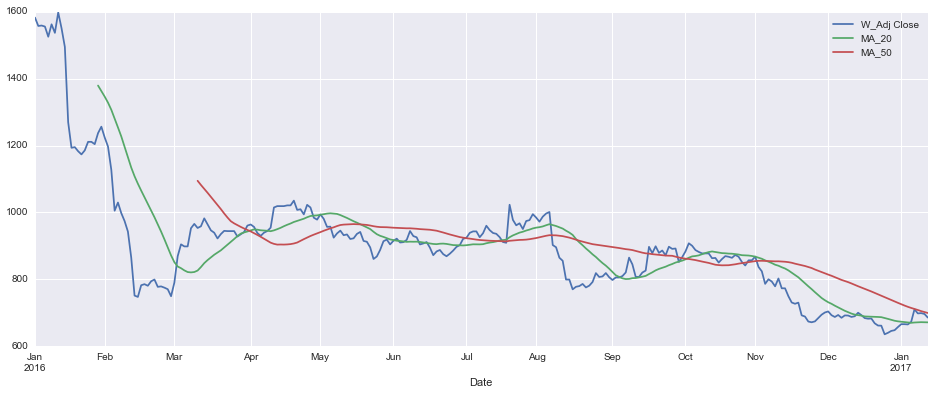

In [28]:
WockPharma[['W_Adj Close', 'MA_20', 'MA_50']].plot(figsize=(16,6))
# So, the curve smoothens as the window (over which MA is calculated) increases.